<a href="https://colab.research.google.com/github/Danvar03/BibliotecaPublica/blob/master/Markov_Montecarlo_C8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(42)

# Enunciado

Un paseados de perros tiene 8 posibles rutas para llegar a casa del dueño del perro

In [12]:
state_space = ("ruta 1", "ruta 2", "ruta 3", "ruta 4", "ruta 5", "ruta 6", "ruta 7", "ruta 8")

transition_matrix = np.array(((0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.3),
                              (0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.1),
                              (0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1),
                              (0.1,0.2,0.2,0.1,0.1,0.1,0.1,0.1),
                              (0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.2),
                              (0.1,0.1,0.1,0.2,0.2,0.1,0.1,0.1),
                              (0.1,0.2,0.1,0.1,0.1,0.1,0.2,0.1),
                              (0.1,0.3,0.1,0.1,0.1,0.1,0.1,0.1)))


In [13]:
n_steps = 500
states = [0]
for i in range(n_steps):
    states.append(np.random.choice((0, 1, 2,3,4,5,6,7), p=transition_matrix[states[-1]]))
states = np.array(states)


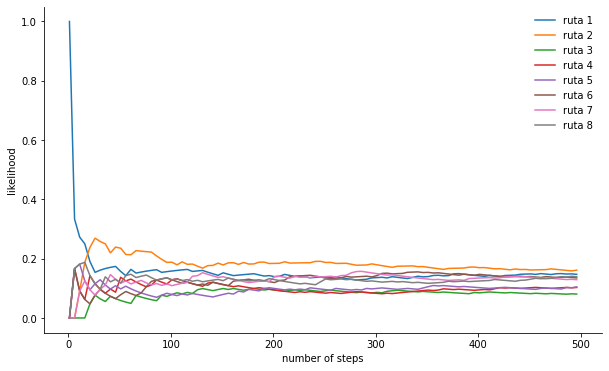

In [14]:
def despine(ax, spines=('top', 'left', 'right')):
    for spine in spines:
        ax.spines[spine].set_visible(False)

fig, ax = plt.subplots()
width = 1000
offsets = range(1, n_steps, 5)
for i, label in enumerate(state_space):
    ax.plot(offsets, [np.sum(states[:offset] == i) / offset
            for offset in offsets], label=label)
ax.set_xlabel("number of steps")
ax.set_ylabel("likelihood")
ax.legend(frameon=False)
despine(ax, ('top', 'right'))
plt.show()

In [15]:
#IMPLEMENTING THE METROPOLIS-HASTINGS ALGORITHM IN PYTHON

def log_prob(x):
     return -0.5 * np.sum(x ** 2)

def proposal(x, stepsize):
    return np.random.uniform(low=x - 0.5 * stepsize,
                             high=x + 0.5 * stepsize,
                             size=x.shape)
    
def p_acc_MH(x_new, x_old, log_prob):
    return min(1, np.exp(log_prob(x_new) - log_prob(x_old)))

def sample_MH(x_old, log_prob, stepsize):
    x_new = proposal(x_old, stepsize)
    # here we determine whether we accept the new state or not:
    # we draw a random number uniformly from [0,1] and compare
    # it with the acceptance probability
    accept = np.random.random() < p_acc_MH(x_new, x_old, log_prob)
    if accept:
        return accept, x_new
    else:
        return accept, x_old

def build_MH_chain(init, stepsize, n_total, log_prob):

    n_accepted = 0
    chain = [init]

    for _ in range(n_total):
        accept, state = sample_MH(chain[-1], log_prob, stepsize)
        chain.append(state)
        n_accepted += accept

    acceptance_rate = n_accepted / float(n_total)

    return chain, acceptance_rate



In [16]:
chain, acceptance_rate = build_MH_chain(np.array([2.0]), 3.0, 10000, log_prob)
chain = [state for state, in chain]
print("Acceptance rate: {:.3f}".format(acceptance_rate))
last_states = ", ".join("{:.5f}".format(state)
                        for state in chain[-10:])
print("Last ten states of chain: " + last_states)

Acceptance rate: 0.721
Last ten states of chain: -0.09973, 0.97406, 0.97406, 0.49059, 1.34558, 1.34558, 0.05109, 0.05109, -0.23408, 0.07461


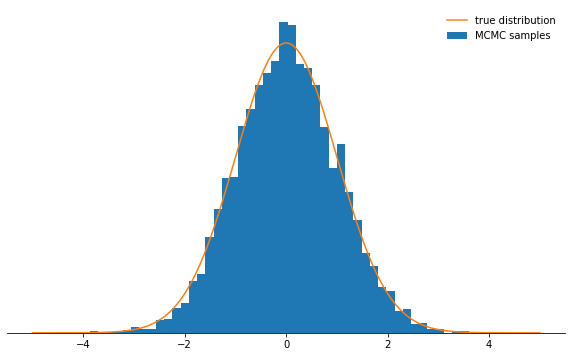

In [17]:
def plot_samples(chain, log_prob, ax, orientation='vertical', normalize=True,
                 xlims=(-5, 5), legend=True):
    from scipy.integrate import quad

    ax.hist(chain, bins=50, density=True, label="MCMC samples",
           orientation=orientation)
    # we numerically calculate the normalization constant of our PDF
    if normalize:
        Z, _ = quad(lambda x: np.exp(log_prob(x)), -np.inf, np.inf)
    else:
        Z = 1.0
    xses = np.linspace(xlims[0], xlims[1], 1000)
    yses = [np.exp(log_prob(x)) / Z for x in xses]
    if orientation == 'horizontal':
        (yses, xses) = (xses, yses)
    ax.plot(xses, yses, label="true distribution")
    if legend:
        ax.legend(frameon=False)

fig, ax = plt.subplots()
plot_samples(chain[500:], log_prob, ax)
despine(ax)
ax.set_yticks(())
plt.show()

Acceptance rate: 0.112


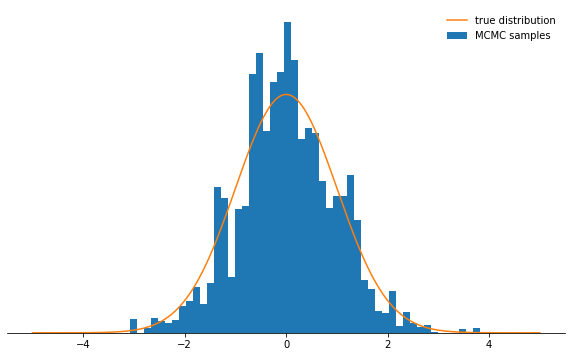

In [18]:
def sample_and_display(init_state, stepsize, n_total, n_burnin, log_prob):
    chain, acceptance_rate = build_MH_chain(init_state, stepsize, n_total, log_prob)
    print("Acceptance rate: {:.3f}".format(acceptance_rate))
    fig, ax = plt.subplots()
    plot_samples([state for state, in chain[n_burnin:]], log_prob, ax)
    despine(ax)
    ax.set_yticks(())
    plt.show()

sample_and_display(np.array([2.0]), 30, 10000, 500, log_prob)

Acceptance rate: 0.995


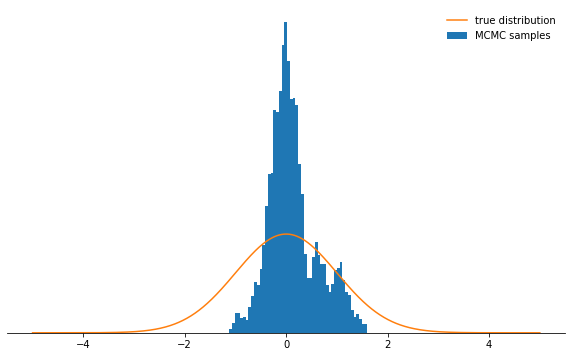

In [19]:
sample_and_display(np.array([2.0]), 0.1, 10000, 500, log_prob)

Acceptance rate: 0.990


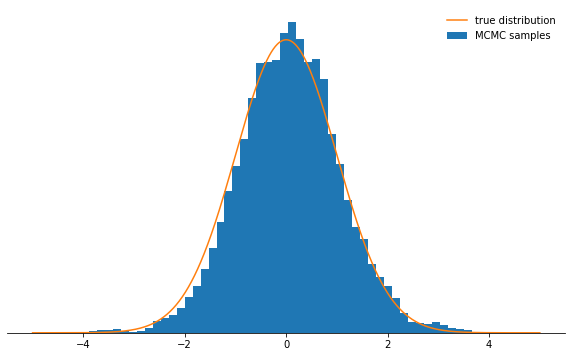

In [10]:
sample_and_display(np.array([2.0]), 0.1, 500000, 25000, log_prob)